# **Анализ бизнес - показателей**

Задача исследования: Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс


В рамках исследования необходимо изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

Исследование пройдёт в 4 этапа:  
1 Загрузка данных и подготовка их к анализу.  
2 Указание функции для расчёта и анализа LTV, ROI, удержания и конверсии.  
3 Исследовательский анализ данных.  
4 Маркетинг.  
5 Оценить окупаемость рекламы.  
6 Выводы  


### Загрузка данных и подготовка их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`
- заказы: `/datasets/orders_info_short.csv`
- расходы: `/datasets/costs_info_short.csv`

Изучим данные и выполним предобработку. Проверим есть ли в данных пропуски и дубликаты. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Для начала посмотрим общую информацию содержимого файлов.

In [2]:
try:
    visits_data, orders_data, costs_data = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv'),
    )
except:
    print('Проблема при загрузки базы, проверить путь')

In [3]:
visits_data.info()
orders_data.info()
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

Необходимо заменить формат данных в столбцах с датами,а также для удобства привести названия столбцов к нижнему регистру. 

In [4]:
#приведем названия столбцов к нижнему регистру  и переименуем столбцы с пробелами
visits_data.columns = visits_data.columns.str.lower().str.replace(' ', '_')
orders_data.columns = orders_data.columns.str.lower().str.replace(' ', '_')
costs_data.columns = costs_data.columns.str.lower()

In [5]:
#переименуем столбцы с пробелами
#visits_data.rename(columns = {'user id':'user_id', 'session start':'session_start', 'session end':'session_end'}, inplace = True)
#orders_data.rename(columns = {'user id':'user_id', 'event dt':'event_dt'}, inplace = True)

In [6]:
#преобразуем данные в тип данных datetime
visits_data['session_start'] = pd.to_datetime(visits_data['session_start'])
visits_data['session_end'] = pd.to_datetime(visits_data['session_end'])
orders_data['event_dt'] = pd.to_datetime(orders_data['event_dt'])
costs_data['dt'] = pd.to_datetime(costs_data['dt']).dt.date

In [7]:
visits_data.head(5)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
orders_data.head(5)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [9]:
costs_data.head(5)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


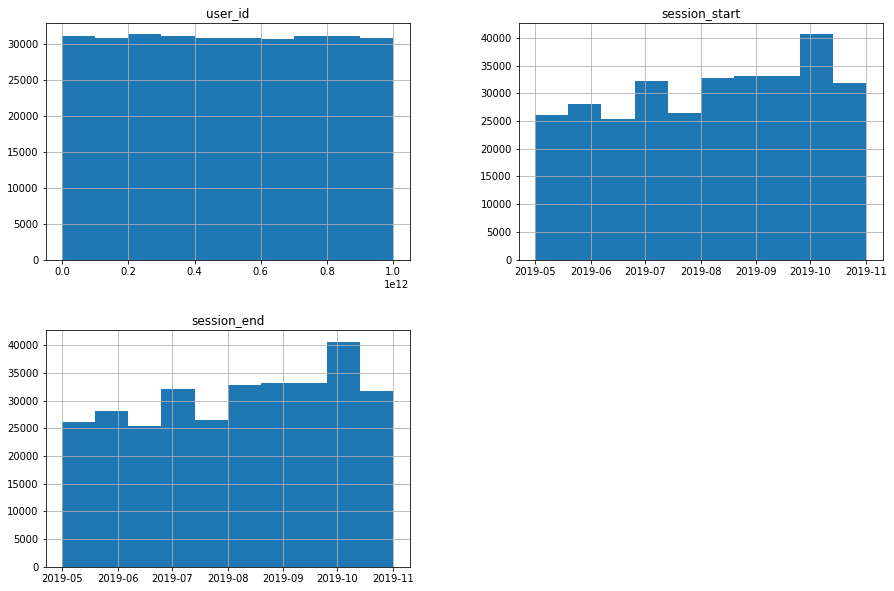

In [10]:
visits_data.hist(figsize=(15, 10));

Период начала и завешения сессий соответсвует аналитическому периоду.

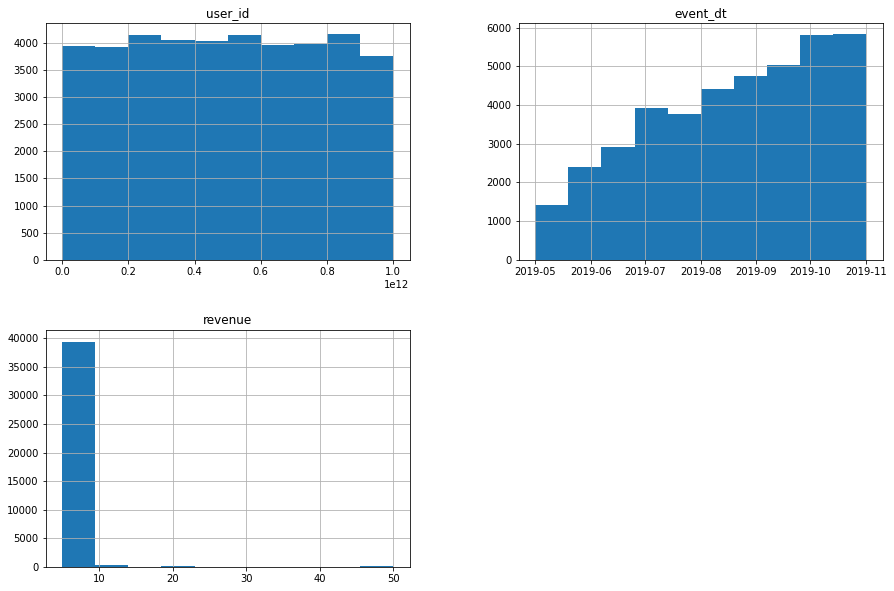

In [11]:
orders_data.hist(figsize=(15, 10));

Период покупок соответсвует аналитическому периоду.

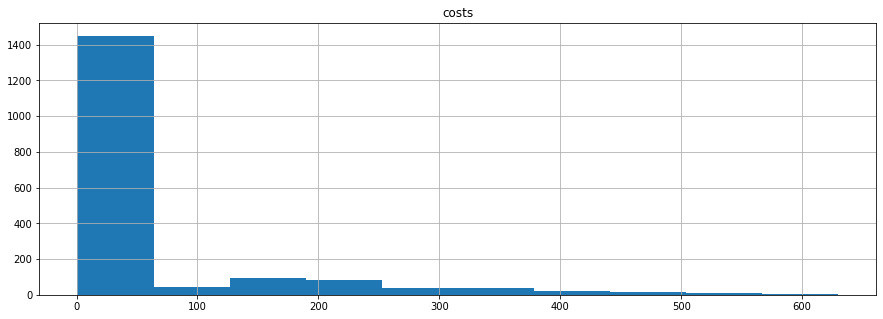

In [12]:
costs_data.hist(figsize=(15, 5));

На графиках с кол-вом сессий и заказов заметна динамика на увеличение объема в течении анализируемого периодаю. В ходе анализа важно будет определить почему это приводит к обратному результату по доходности.

In [13]:
#определим есть ли в каких-то столбцах пропуски.
orders_data.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [14]:
orders_data.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [15]:
costs_data.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

В данных отсутсвуют пропуски.
Проверим есть ли выбросы в данных с cессиями, заказами и затратами на рекламу.

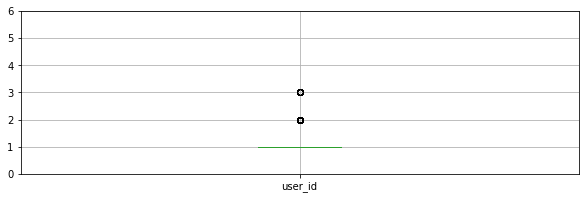

In [16]:
visits=visits_data.pivot_table(index = 'session_start', values = 'user_id', aggfunc = 'count')
axes = visits.boxplot(column = 'user_id',figsize=(10,3), whis=[5,95], return_type='axes')
axes.set_ylim(0,6)
plt.show;

Кол-во сессий на одного пользователя от 1 до 3, что соответвует реальному поведению пользователей. Выбросов в базе сессий не обнаружено.

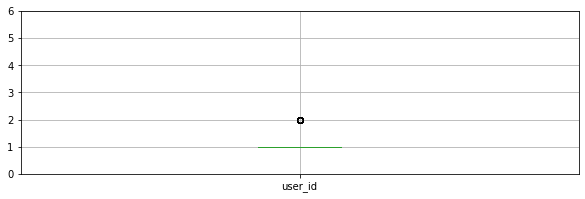

In [17]:
orders= orders_data.pivot_table(index = 'event_dt', values = 'user_id', aggfunc = 'count')
axes = orders.boxplot(column = 'user_id',figsize=(10,3), whis=[5,95], return_type='axes')
axes.set_ylim(0,6)
plt.show;

Пользователи совершали 1-2 покупки в течении анализируемого периода, что также соответсвует логике поведения пользователей. Аномалий в базе покупок не обнаружено.

In [18]:
costs_data.query('costs < 0').head(5)

,dt,channel,costs


Отрицательных значений в данных об инвестициях в рекламу нет.

Проверим наличие дубликатов

In [19]:
visits_data.duplicated().sum()

0

In [20]:
orders_data.duplicated().sum()

0

In [21]:
costs_data.duplicated().sum()

0

В рамках предобработки данных привели к удобному для анализа формату файлы, проверили данные на наличие пропусков и дубликатов. 

### Указание функций для расчёта и анализа LTV, ROI, удержания и конверсии..

Добавим функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [22]:
#get_profiles() — для создания профилей пользователей

def get_profiles(sessions, orders,ad_costs, dimensions=[]):

    # находим параметры первых посещений
    profiles = (
        visits_data.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders_data['user_id'].unique())

       # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [23]:
#get_retention() — для подсчёта Retention Rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits_data[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:
#get_conversion() — для подсчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders_data.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [25]:
#get_ltv() — для подсчёта LTV

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders_data[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


In [26]:
#filter_data() — для сглаживания данных
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


In [27]:
#plot_retention() — для построения графика Retention Rate
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()


In [28]:
#plot_conversion() — для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



In [29]:
#plot_ltv_roi — для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


### Исследовательский анализ данных

В рамках исследования:
- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [30]:
# получаем профили пользователей
profiles = get_profiles(visits_data, orders_data, costs_data)
print(profiles.head(5))


    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [31]:
costs_data['dt'].min()

datetime.date(2019, 5, 1)

In [32]:
costs_data['dt'].max()

datetime.date(2019, 10, 27)

Сформирован профиль пользователей, который учитывает период посещения, а также разбивку на устройство и канал привлечения(реклама).  
Минимальный срок привлечения пользователей - 1 мая 2019г, самый поздний срок 27 октября 2019г.

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [33]:
profiles_country=profiles.groupby('region').agg({'user_id':'nunique'}).sort_values(by='user_id')

profiles_country['q-ty_payers']=profiles.query('payer == True').\
groupby('region').agg({'user_id':'nunique'}).\
sort_values(by='user_id')
profiles_country['%'] = (profiles_country['q-ty_payers'] / profiles_country['user_id'] *100)
profiles_country

,user_id,q-ty_payers,%
region,,,
Germany,14981,616,4.111875
France,17450,663,3.799427
UK,17575,700,3.982930
United States,100002,6902,6.901862


Больше всего пользователей приходит из США ~ 67% всего объема. Из них платящие пользователи составляют 6.9%, это также лучший показатель по сравнению с остальными странами. Далее в порядке убывания следует Германия - 4.1% платящих, Великобритания - 3.9%, Франция - 7.8%.

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.


In [34]:
profiles_device=profiles.groupby('device').agg({'user_id':'nunique'}).sort_values(by='user_id')

profiles_device['q-ty_payers']=profiles.query('payer == True').\
groupby('device').agg({'user_id':'nunique'}).\
sort_values(by='user_id')
profiles_device['%'] = (profiles_device['q-ty_payers'] / profiles_device['user_id'] *100)
profiles_device

,user_id,q-ty_payers,%
device,,,
Mac,30042,1912,6.364423
PC,30455,1537,5.046790
Android,35032,2050,5.851793
iPhone,54479,3382,6.207897


In [35]:
54479/(30042+30455+35032+54479)

0.3631739640552504

In [36]:
35032/(30042+30455+35032+54479)

0.23353421150871953

Распределение пользователей по устройствам перевешивает поток с IPhone ~36%, на прочие устройства приходится по ~20%. При этом наиболее высокая доля платящих пользователей приходит с Mac-6.4%, IPhone-6.2%, Android-5.9%, PC-5.0%.

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


In [37]:
profiles_channel=profiles.groupby('channel').agg({'user_id':'nunique'})
profiles_channel['q-ty_payers']=profiles.query('payer == True').groupby('channel').agg({'user_id':'nunique'})
profiles_channel['%'] = (profiles_channel['q-ty_payers'] / profiles_channel['user_id'] *100)
profiles_channel = profiles_channel.sort_values(by='%')
profiles_channel

,user_id,q-ty_payers,%
channel,,,
organic,56439,1160,2.055316
OppleCreativeMedia,8605,233,2.707728
LeapBob,8553,262,3.063253
MediaTornado,4364,156,3.574702
YRabbit,4312,165,3.826531
WahooNetBanner,8553,453,5.296387
RocketSuperAds,4448,352,7.913669
TipTop,19561,1878,9.600736
lambdaMediaAds,2149,225,10.469986


Наибольший поток пользователей приходит с органики, что говорит о высоком знании приложения, доля плательщиков по этому каналу не высока, но можно сказать, что это условно "бесплатные" пользователи. 
Среди платных каналов привлечения в пятерке лидиров: Faceboom - 12.2% плательщиков, AdNonSense - 11.3%, lambdaMediaAds - 10.4%, TipTop - 9.6%, RocketSuperAds - 7.9%.

В рамках анализа профиля пользователей стоит отметить некоторые специфические особенности:
- Период зафиксированных сессий соответсвует анализируемого периоду.
- Больше всего пользователей приходит из США ~ 67% всего объема. Из них платящие пользователи составляют 6.9%, это также лучший показатель по сравнению с остальными странами. Далее в порядке убывания следует Германия - 4.1% платящих, Великобритания - 3.9%, Франция - 7.8%.
- Распределение пользователей по устройствам перевешивает поток с IPhone ~36%, на прочие устройства приходится по ~20%. При этом наиболее высокая доля платящих пользователей приходит с Mac-6.4%, IPhone-6.2%, Android-5.9%, PC-5.0%.
-  Среди платных каналов привлечения в пятерке лидиров: Faceboom - 12.2% плательщиков, AdNonSense - 11.3%, lambdaMediaAds - 10.4%, TipTop - 9.6%, RocketSuperAds - 7.9%. При этом заметен большой объем органики.


### Маркетинг

В рамках анализа изучим следующие данные:
- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используя профили пользователей.


In [38]:
total_ad_cost = costs_data['costs'].sum()
total_ad_cost.astype('int')

105497

Общую сумму расходов на маркетинг составляет 105 497.  
Посмотрим распредение расходов по каждому рекламному источнику.

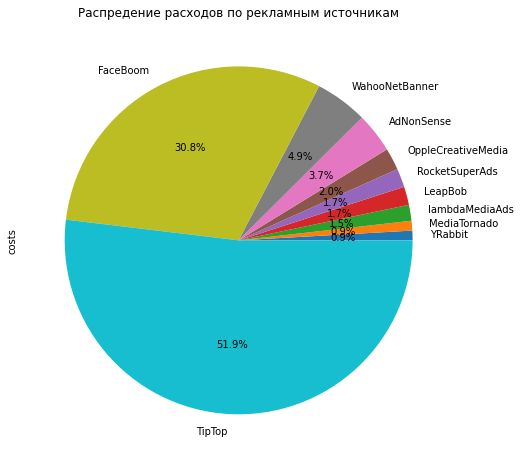

In [39]:
costs_by_channel = costs_data.groupby('channel')['costs'].sum()
costs_by_channel.sort_values().plot(kind='pie', y='costs', figsize = (8,8), autopct = '%.1f%%', \
                                    title = 'Распредение расходов по рекламным источникам');

Половина инвестиций направлена в TipTop - 51.9%, FaceBoom - 30.8%, остальные ~17% инвестиций распределены на прочие каналы.

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

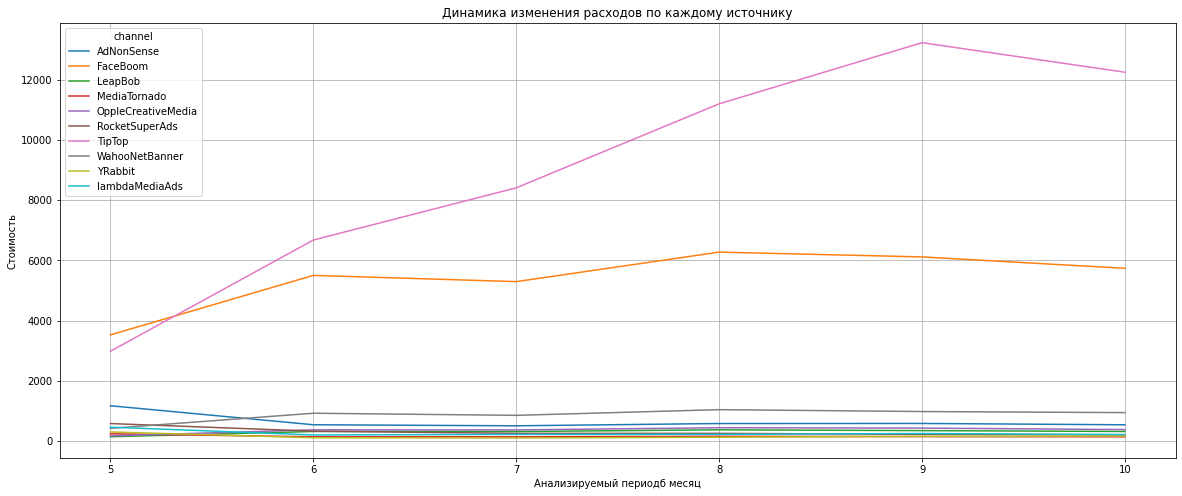

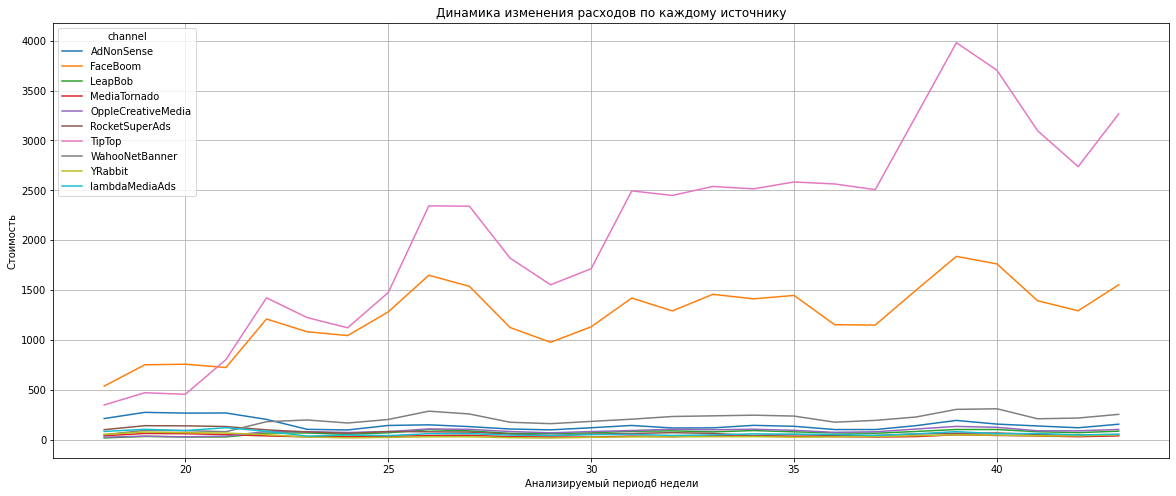

In [40]:
costs_data['dt'] = pd.to_datetime(costs_data['dt'])
costs_data['month'] = pd.DatetimeIndex(costs_data['dt']).month
costs_data['week'] = costs_data['dt'].dt.isocalendar().week
costs_data.pivot_table(index=['month'], columns = 'channel', values = 'costs', aggfunc = 'sum').\
plot(grid = True, figsize=(20,8), title = 'Динамика изменения расходов по каждому источнику')
plt.xlabel('Анализируемый периодб месяц')
plt.ylabel('Стоимость')

costs_data.pivot_table(index=['week'], columns = 'channel', values = 'costs', aggfunc = 'sum').\
plot(grid = True, figsize=(20,8), title = 'Динамика изменения расходов по каждому источнику')
plt.xlabel('Анализируемый периодб недели')
plt.ylabel('Стоимость');

На графике заметно увеличение расходов на рекламу в каналах TipTop и FaceBoom. Инвестиции в прочии каналы поддерживались равномерными в течении всего анализируемого периода.

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя профили пользователей.


In [41]:
# строим таблицу среднего CAC по каналам привлечения
profiles_pivot = profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean')
profiles_pivot.sort_values(by='acquisition_cost')

,acquisition_cost
channel,
organic,0.000000
LeapBob,0.210172
MediaTornado,0.218717
YRabbit,0.218975
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
WahooNetBanner,0.602245
lambdaMediaAds,0.724802
AdNonSense,1.008054


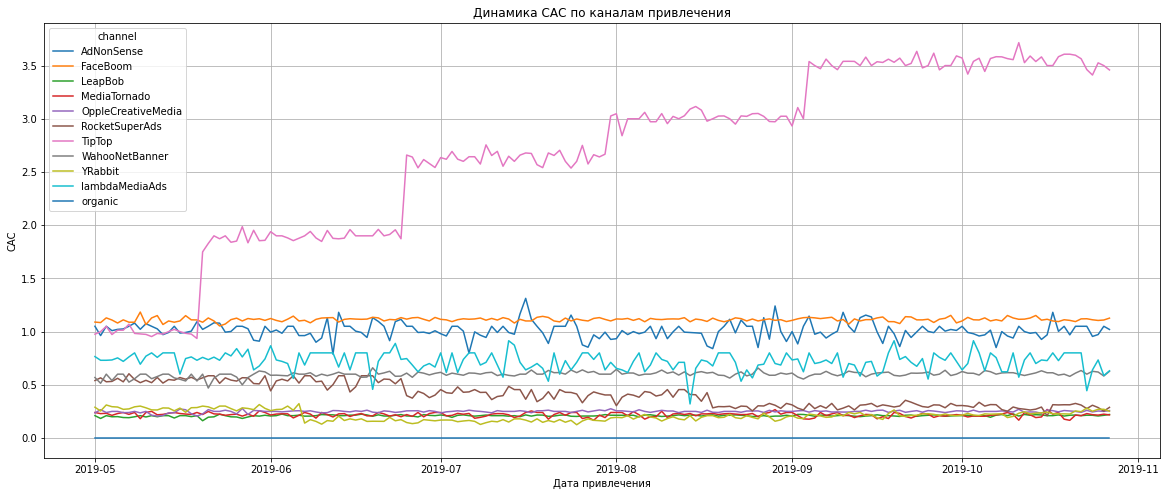

In [42]:
#построим график в динамике
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')\
.plot(grid=True, figsize=(20, 8))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Все каналы кроме TipTop показывают равномерную динамику стоимости привлечения поьзователя. Канал TipTop несмотря на увеличение объема инвестиций в последние месяцы демонстриует низкую динамику по привлечению пользователей. Вероятно, следуем пересмотеть долю инвестиций TipTop в пользу других каналов .

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

В ходе исследования будут изучены следующие метрики:

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?


Установим момент и горизонт анализа данных. 

In [43]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

Исключим пользователей с органическим трафиком, для исключения искажения данных.

In [44]:
profiles = profiles.query('channel != "organic"') 

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

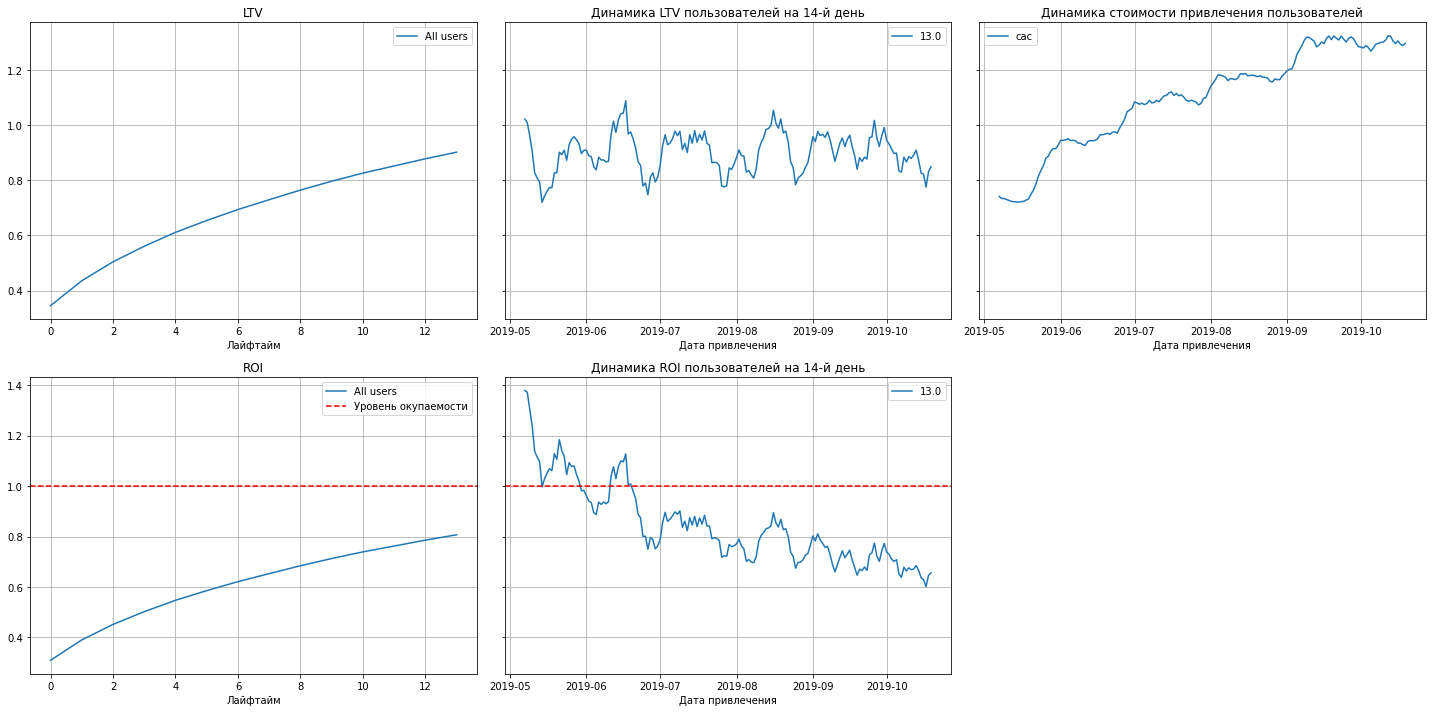

In [45]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, costs_data, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


##### По графикам можно сделать такие выводы:
- Реклама не окупается. ROI в конце второй недели — не достигает 85%.
- CAC растет. Возможно, дело в увеличении рекламного бюджета на инструменты с низкой конверсией.
- Динамика LTV стабильна. Значит, дело не в ухудшении качества пользователей.

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

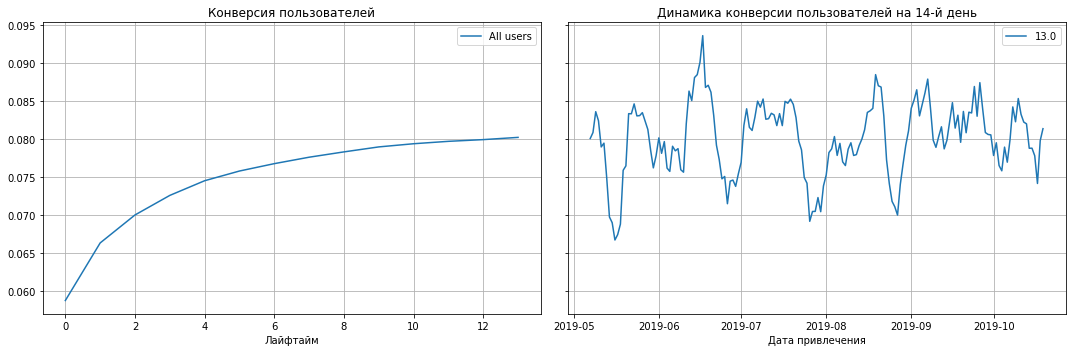

In [46]:
# смотрим конверсию пользователей общую
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, costs_data, observation_date, horizon_days,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Судя по графикам общая конверсия растет, но динамика роста низкая.

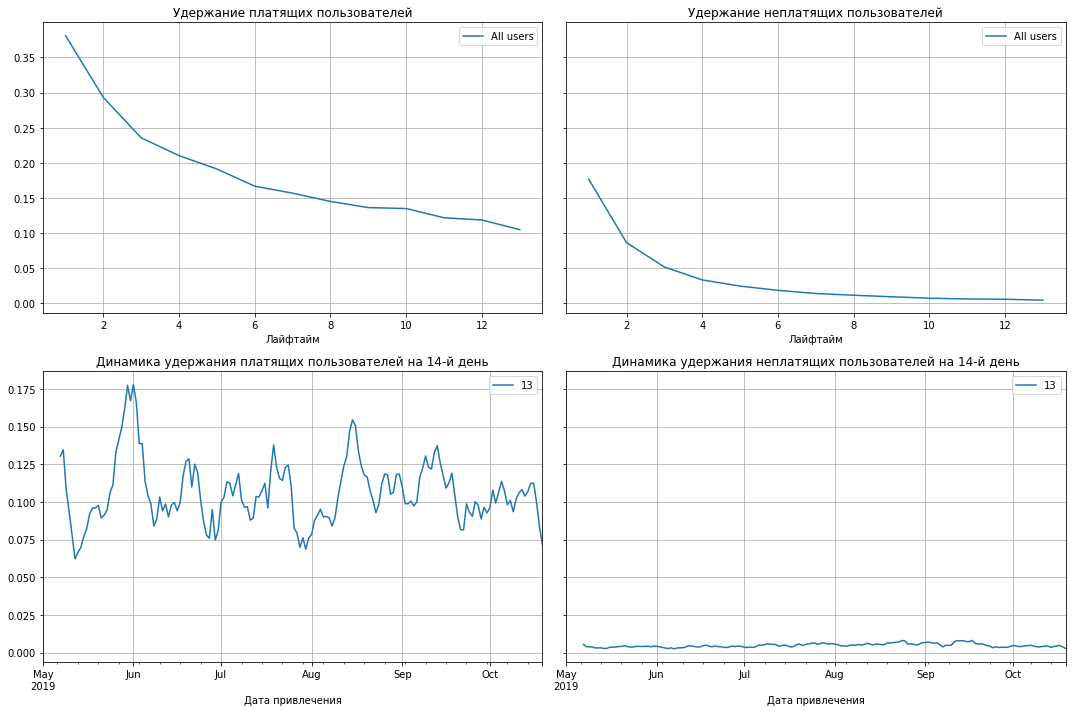

In [47]:
# смотрим общее удержание пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits_data, observation_date, horizon_days,
)

plot_retention(retention_grouped, retention_history, horizon_days)


Динамика удержания на 14й день для платящих пользователей также снижается.

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

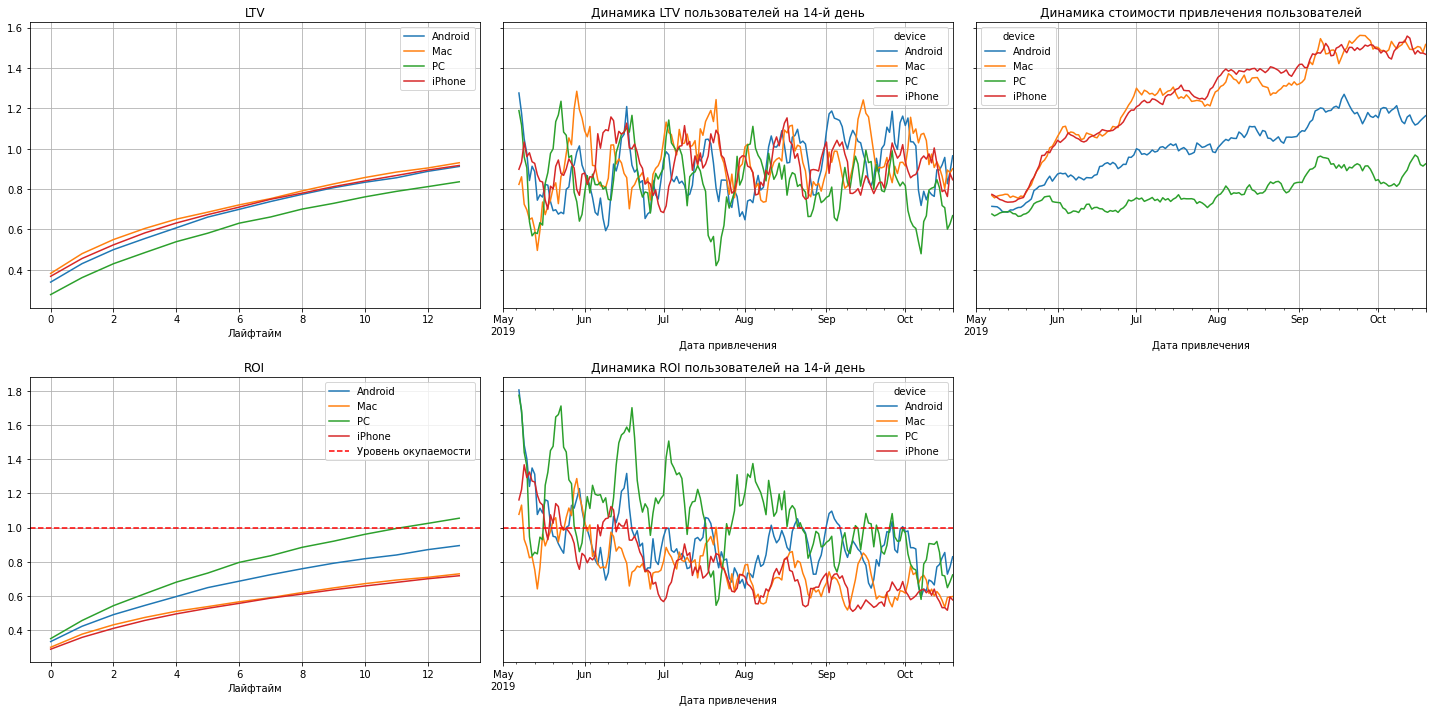

In [48]:
# считаем LTV и ROI в разбивке по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, costs_data, observation_date, horizon_days, dimensions = ['device']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


Судя по графикам, есть проблема с пользователи IPhone  и MAC  - они не окупаются.

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

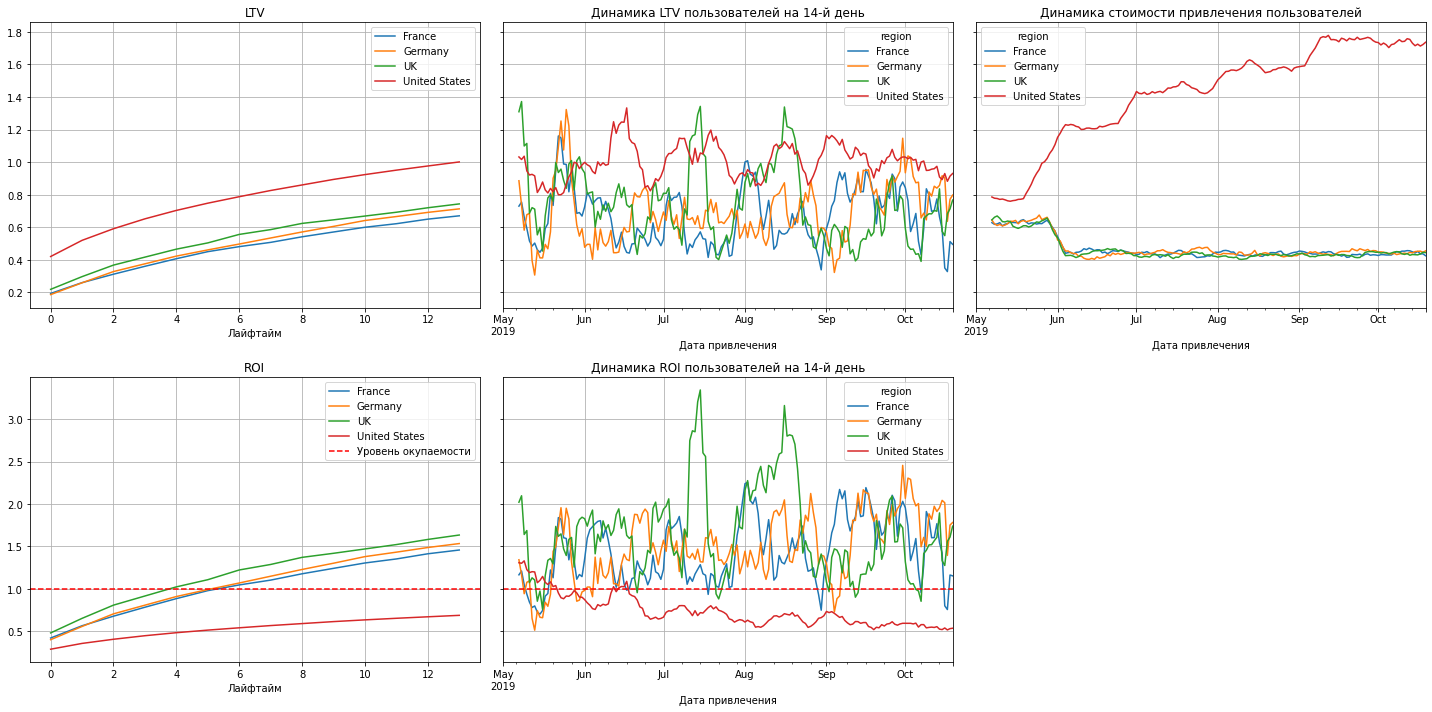

In [49]:
# считаем LTV и ROI в разбивке по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, costs_data, observation_date, horizon_days, dimensions = ['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


Также заметен значительный рост стоимости привлечения пользователя в США, ROI ниже уровня окупаемся и достигает около 80%.

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

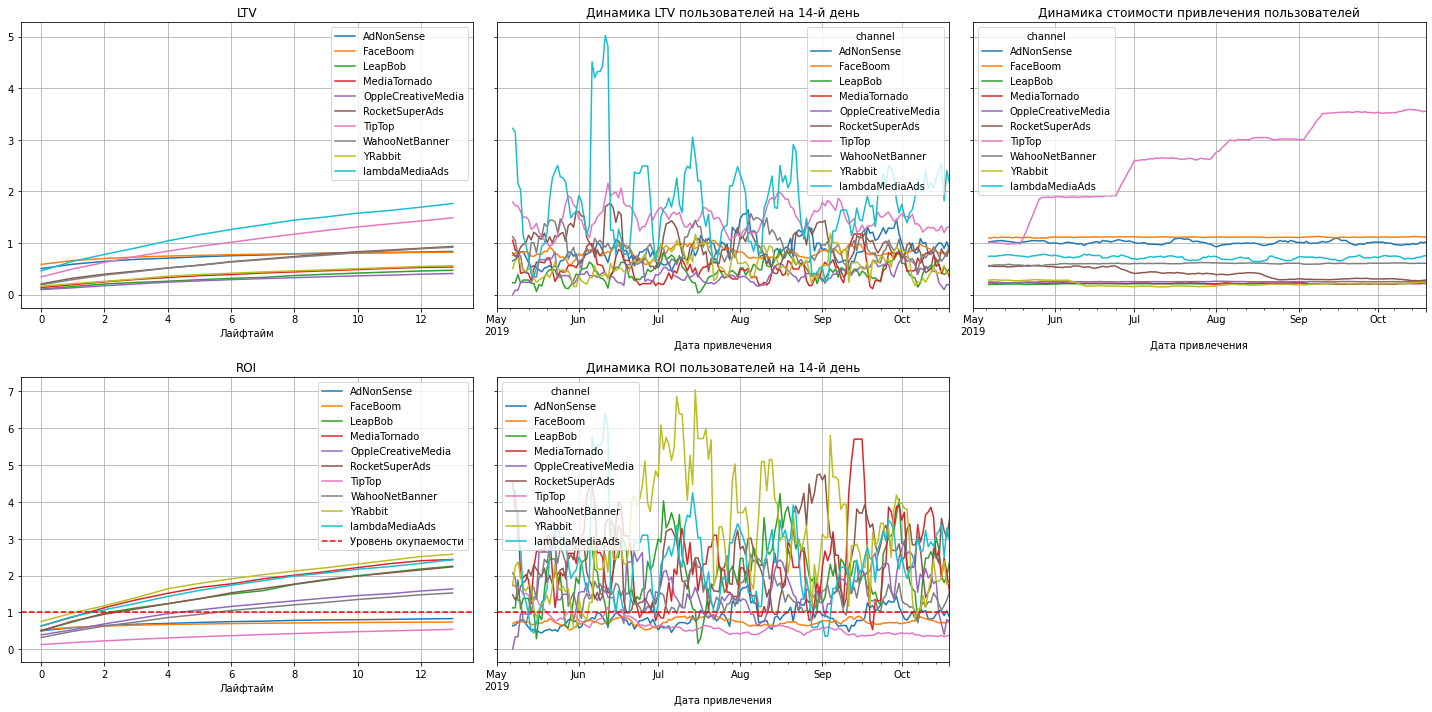

In [50]:
# считаем LTV и ROI в разбивке по каналам привлечения
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, costs_data, observation_date, horizon_days, dimensions = ['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


По графикам видно, что топ каналы рекламных инвестиций не окупаются. Наихудшая динамика по стоимости привлечения пользователя у TipTop, а также Faceboom.

США является регионом наибольшего объема инвестиций в рекламу и при этом демонтсриует наихудшую окупаемость. Посмотрим подробнее как каналы  и устройства отрабатывают в США

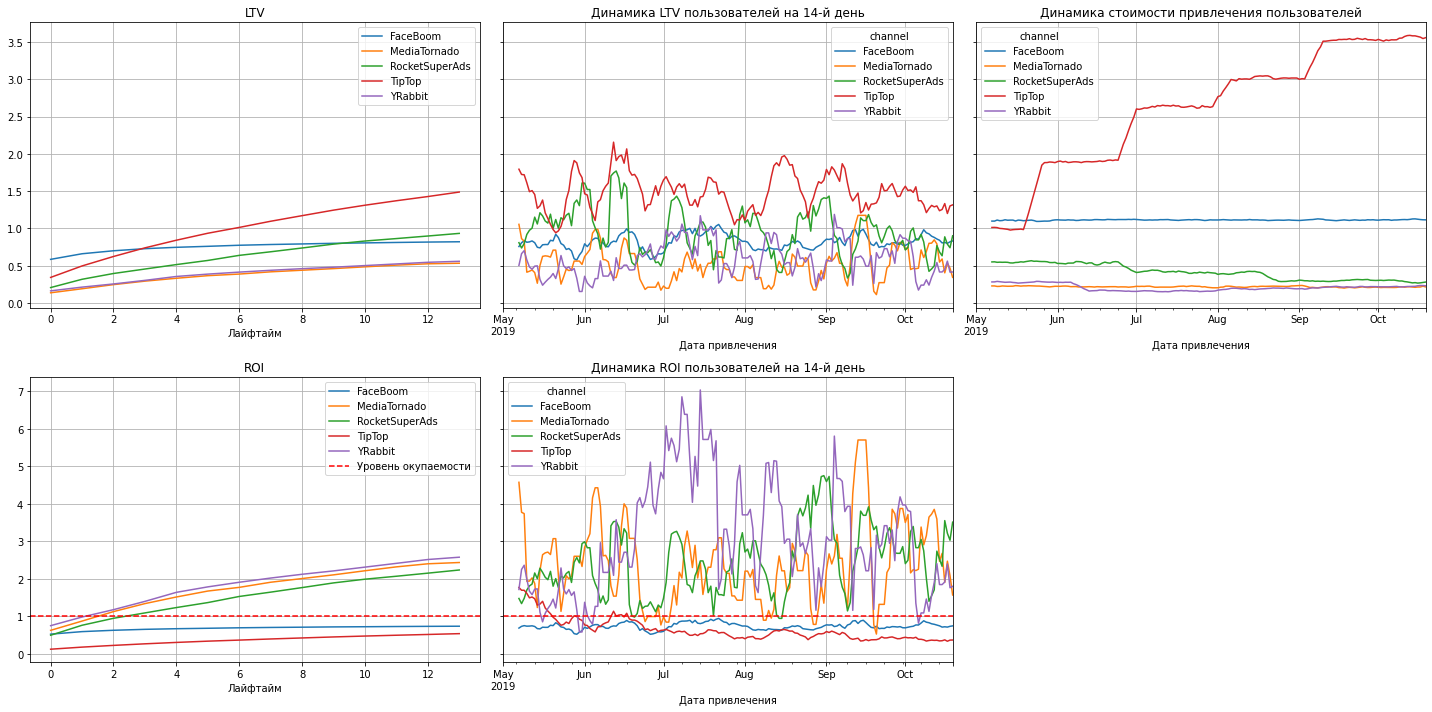

In [51]:
#построим график в динамике по Американскому рынку
profiles_usa = profiles.query('region == "United States"')
# считаем LTV и ROI в разбивке по каналам привлечения в США
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, costs_data, observation_date, horizon_days, dimensions = ['channel']
)

# строим графики (США)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

FaceBoom и  TipTop не достигают уровня окупаемости, вероятно для этого региона стоит пересмотреть инвестиции  рекламу в пользу других каналов.

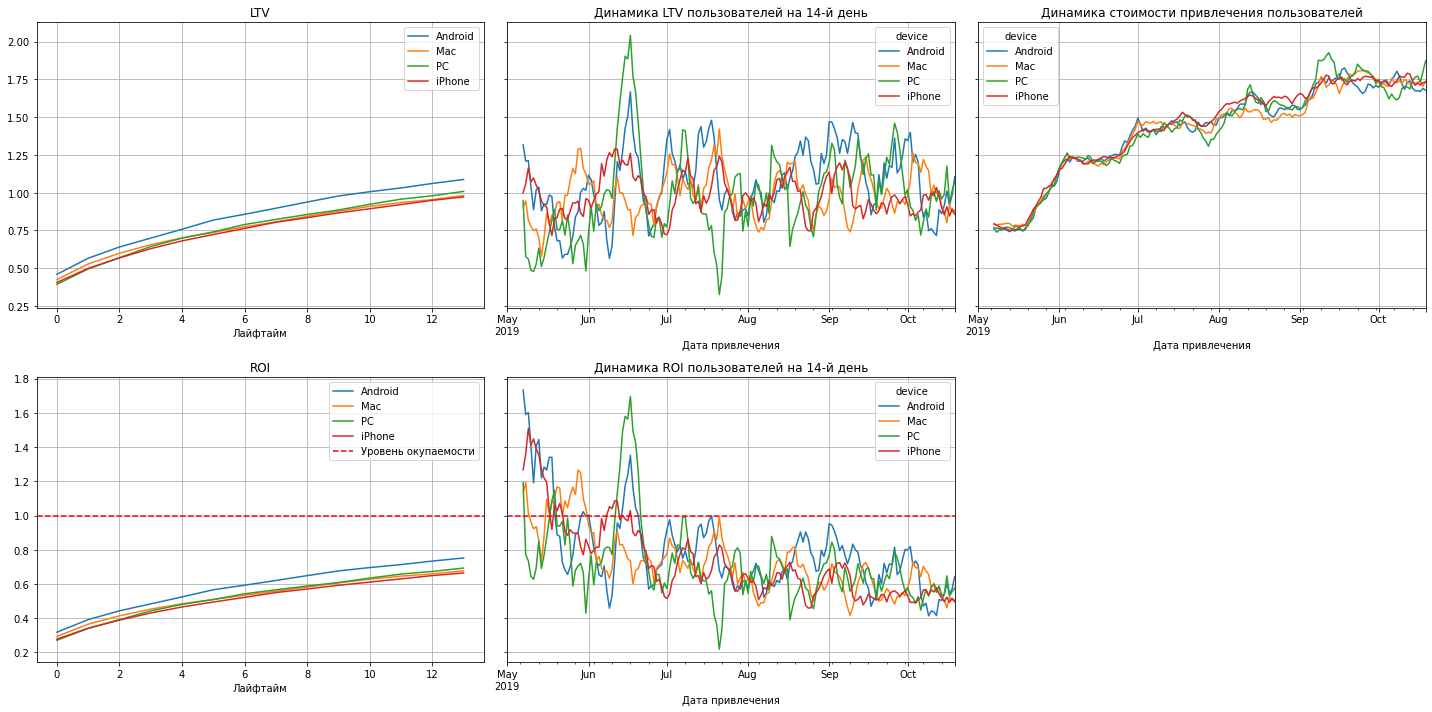

In [52]:
#построим график в динамике по Американскому рынку
profiles_usa = profiles.query('region == "United States"')
# считаем LTV и ROI в разбивке по каналам привлечения в США
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, costs_data, observation_date, horizon_days, dimensions = ['device']
)

# строим графики (США)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Все устройства демонстрируют проблему окупаемости, возможон дело в технической неполадке. Проверим удержание пользователей в разбивке по устройствам:

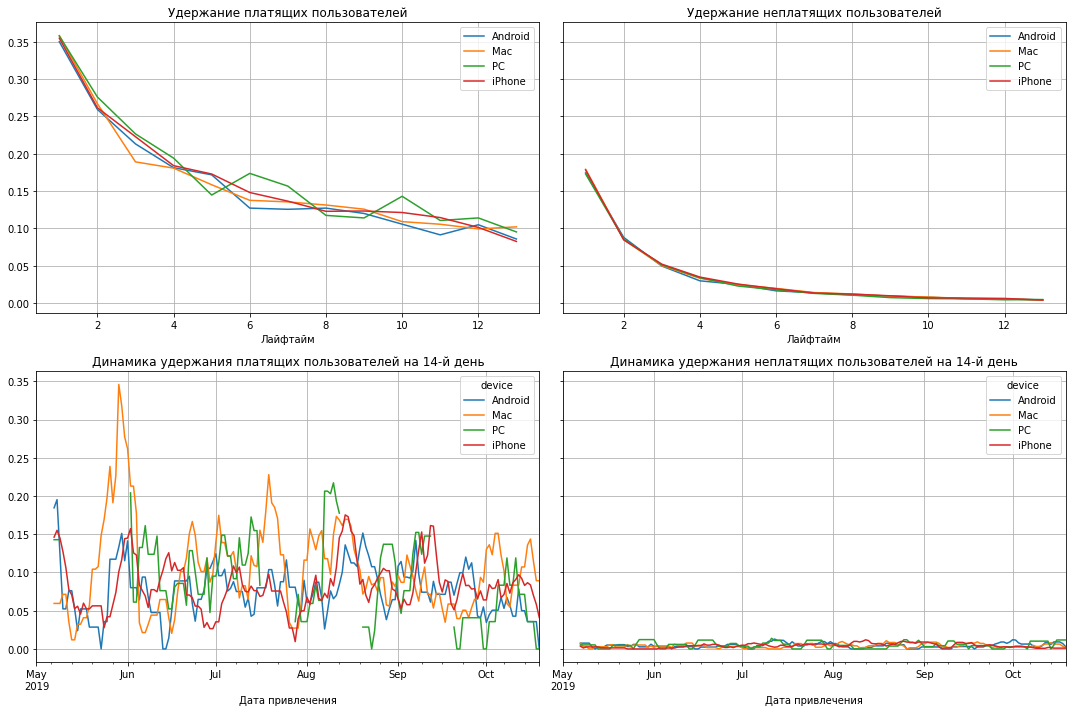

In [53]:
# смотрим общее удержание пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits_data, observation_date, horizon_days,  dimensions = ['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Все устройства демнострируют схожую динамику, как для платных, так и неплатящих пользователей.

В целом проанализировав окупаемость инвестиций можно сделать следующие выводы:
- Инвестиции в рекламу не окопаются
- Есть проседания ROI по нескольким каналам коммуникации (TipTop, Faceboom), а также в США, а также у пользователей IPhone и MAc.
- Проблемы окупаемости в каналах рекламы могут быть вызваны нехваткой релевантных пользователей - исчерпанность ЦА на площадке. - Снижение ROI в США может быть вызвано проблемами с работой устройств - так как все типы устройств для платящих и неплатящих пользователй демонструруют одинаковую динамику.


### Выводы


В ходе исследования была проанализирована окупаемость рекламных инвестиций.
Для определения причины неэффективности привлечения пользователей, анализировались срезы по устройствам пользователей, потоку согласно географии, а также каналам коммуникации с которых пришли пользователи. Органика в рамках исследования не изучалась.

Есть несколько вероятных точек проседания окупаемости:
- Есть проседания ROI по нескольким каналам коммуникации (TipTop, Faceboom), а также в США, а также у пользователей IPhone и MAC.
- Проблемы окупаемости в каналах рекламы могут быть вызваны нехваткой релевантных пользователей - исчерпанность ЦА на площадке. - Снижение ROI в США может быть вызвано проблемами с работой устройств - так как все типы устройств для платящих и неплатящих пользователй демонструруют одинаковую динамику.


В качестве рекомендаций для отдела маркетинга можно выделить следующие направления:
- Пересмотреть объем рекламных инвестиий в пользу каналов с более высокой окупаемостью, например YRabbit, RocketSuperAds,lambdaMediaAds
- Увеличение инвестиций в Германии, Франции и Великобритании.
- Проверка багов работы приложения на устройствах IPhone и MAC в целом по миру. А также проверку работу приложения в США.
